In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('./Datasets/Question-3/airfoil.csv',header=None)
df_train,df_test=train_test_split(np.array(df), test_size=0.2,random_state=40)

In [3]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(1202, 6)


In [4]:
print(df.head())

        0     1       2     3         4        5
0  8000.0   4.0  0.2286  39.6  0.004738  113.129
1  6300.0   0.0  0.0508  55.5  0.000762  132.796
2   400.0   4.0  0.2286  55.5  0.004286  123.274
3  1250.0  15.4  0.0508  39.6  0.028259  126.743
4   800.0   7.3  0.2286  39.6  0.012348  126.299


In [5]:
print(type(df_train))
print(df_train.shape)
print(type(df_test))
print(df_test.shape)

<class 'numpy.ndarray'>
(961, 6)
<class 'numpy.ndarray'>
(241, 6)


In [6]:
X_train=df_train[:,0:5]
X_label=df_train[:,5:]
#print(type(X_train))
print(X_train.shape)
#print(type(X_label))
print(X_label.shape)

Y_test=df_test[:,0:5]
Y_label=df_test[:,5:]
print(Y_test.shape)
print(Y_label.shape)

(961, 5)
(961, 1)
(241, 5)
(241, 1)


In [7]:
class Airfoil:
    def getPredict(self,coeffs,row):
        yPred=coeffs[0]
        for i in range(1,len(coeffs)):
            yPred=yPred+(coeffs[i]*row[i-1])
        return yPred
    
    def fit(self,X,Y,initial_value,iterations,l_rate):
        coeffs = []
        #l_rate = 0.001
        for i in range(0,len(X[0])+1):
            coeffs.append(initial_value)
        for i in range(iterations):
            for j in range(len(X)):
                yPred=self.getPredict(coeffs,X[j])
                error=yPred-Y[j]
                coeffs[0]-=l_rate*error
                for k in range(len(X[j])):
                    coeffs[k+1]-=l_rate*error*X[j][k]
        return coeffs
    
    #def train(self,path_to_train_data):
        
        

In [8]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)  #normalizing data
Y_test=scaler.fit_transform(Y_test)

airFoil=Airfoil()
initial_value=[0.0,2.5,5.0,7.5,10.0]
iterations=[200,400,600,800,1000,1200]
l_rate1 = 0.001

rscore=[]
msqerror=[]

for i in range(len(initial_value)):
    r_score = []
    mean_sq_error = []
    for j in range(len(iterations)):
        coefficient=airFoil.fit(X_train,X_label,initial_value[i],iterations[j],l_rate1)
        predictions=[]
        for k in range(len(Y_test)):
            predictions.append(airFoil.getPredict(coefficient,Y_test[k]))
        r_score.append(r2_score(Y_label,predictions))
        mean_sq_error.append(mean_squared_error(Y_label,predictions))
        
    rscore.append(r_score)
    msqerror.append(mean_sq_error)
        

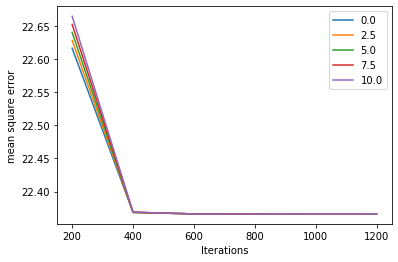

In [20]:
#yaxis=[22.60,22.61,22.62,22.63,22.64,22.65,22.66,22.67,22.68,22.69,22.70]
for i in range(len(msqerror)):
    plt.plot(iterations, msqerror[i], label=initial_value[i])
    #plt.yticks(yaxis)
    plt.legend(loc="upper right")
    plt.xlabel("Iterations")
    plt.ylabel("mean square error")



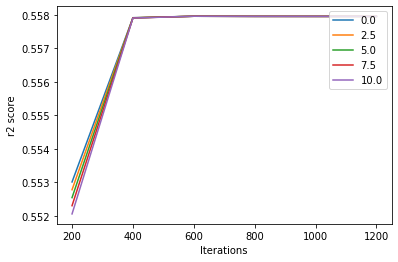

In [24]:
for i in range(len(rscore)):
    plt.plot(iterations,rscore[i],label=initial_value[i])
    plt.xlabel("Iterations")
    plt.ylabel("r2 score")
    plt.legend(loc="upper right")

In [23]:
initial_value1=0.0
iterations=[200,400,600,800,1000,1200]
l_rate = [0.001,0.003,0.01,0.03,0.1,0.3]

rscore1=[]
msqerror1=[]

for i in range(len(l_rate)):
    r_score = []
    mean_sq_error = []
    for j in range(len(iterations)):
        coefficient=airFoil.fit(X_train,X_label,initial_value1,iterations[0],l_rate[i])
        predictions=[]
        for k in range(len(Y_test)):
            predictions.append(airFoil.getPredict(coefficient,Y_test[k]))
        r_score.append(r2_score(Y_label,predictions))
        mean_sq_error.append(mean_squared_error(Y_label,predictions))
        
    rscore1.append(r_score)
    msqerror1.append(mean_sq_error)
        

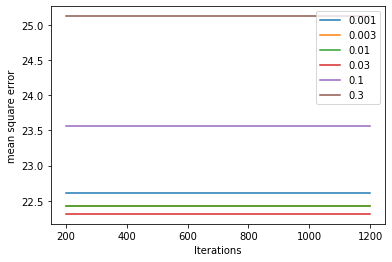

In [25]:
for i in range(len(msqerror1)):
    plt.plot(iterations, msqerror1[i], label=l_rate[i])
    plt.legend(loc="upper right")
    plt.xlabel("Iterations")
    plt.ylabel("mean square error")


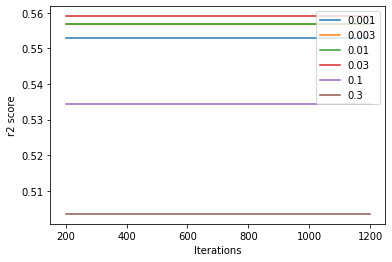

In [26]:
for i in range(len(rscore1)):
    plt.plot(iterations,rscore1[i],label=l_rate[i])
    plt.xlabel("Iterations")
    plt.ylabel("r2 score")
    plt.legend(loc="upper right")